In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
data = pd.read_csv("/Users/victoriaguo/Desktop/DS 4002/project 1/final_data.csv")

In [3]:
# generate table of sentiment vs. helpfulness 

pd.DataFrame(data.groupby('sentiment')['helpful_rate'].mean())

,helpful_rate
sentiment,
Negative,0.307559
Positive,0.260505


helpful rate is higher for negative than positive reviews 

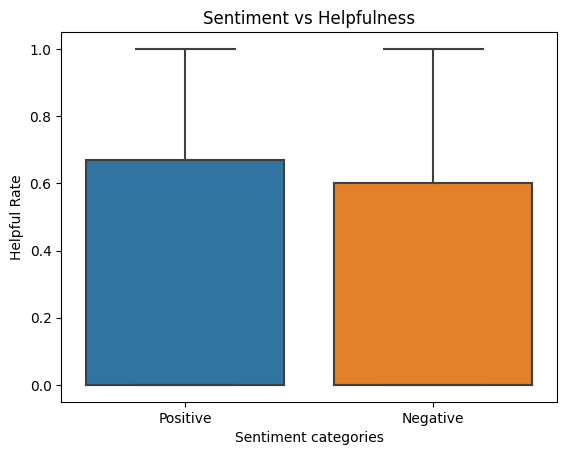

In [4]:
# create boxplot that shows sentiment and helpfulness

sns.boxplot( x=data["sentiment"], y=data["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('Helpful Rate')
plt.show()

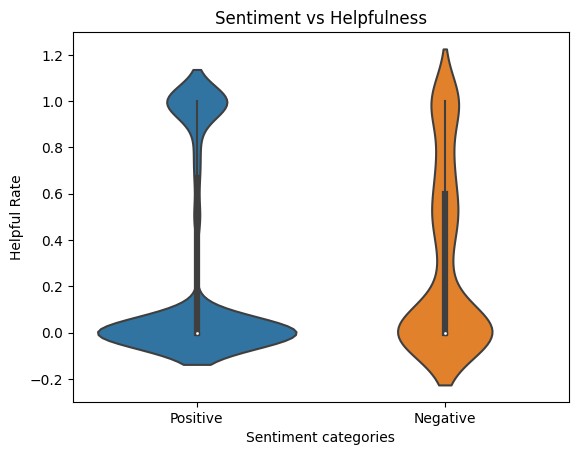

In [5]:
# create violin plot because it's hard to tell with boxplot

sns.violinplot( x=data["sentiment"], y=data["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('Helpful Rate')
plt.show()

In [6]:
# remove 0 values in helpful rate column 

data = data[data['helpful_rate'] != 0.00]


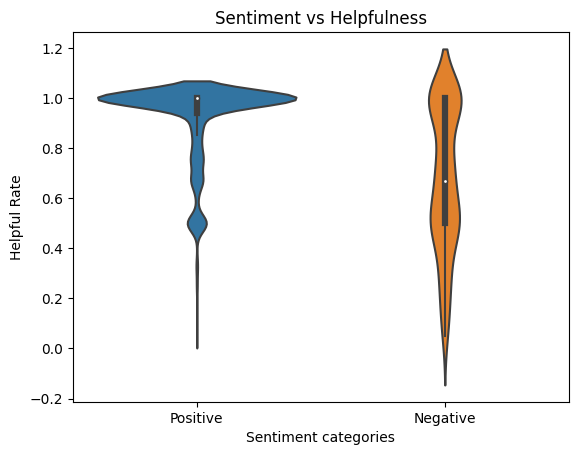

In [7]:
# create new violin plot with removed observations
sns.violinplot( x=data["sentiment"], y=data["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('Helpful Rate')
plt.show()

positive rates are more helpful than negative rates

In [8]:
# new table with removed 0 values 

pd.DataFrame(data.groupby('sentiment')['helpful_rate'].mean())

,helpful_rate
sentiment,
Negative,0.668047
Positive,0.918437


positive rates are more helpful than negative rates

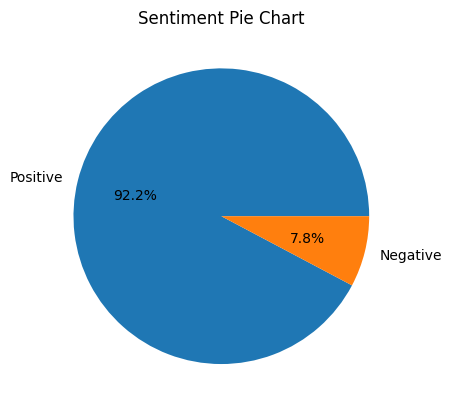

In [9]:
# create pie chart 

category_counts = data['sentiment'].value_counts()

# Create the pie chart
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Pie Chart')
plt.show()


mostly positive reviews

In [10]:
# data cleaning for bigram plot
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']


data['reviews'] = data['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [11]:
# bigram plots 
positive_reviews = data[data["sentiment"]=='Positive'].dropna()
negative_reviews = data[data["sentiment"]=='Negative'].dropna()

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(data, color):
    trace = go.Bar(
        y=data["word"].values[::-1],
        x=data["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

from collections import defaultdict

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_reviews["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace_pos = horizontal_bar_chart(fd_sorted.head(20), 'green')



## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_reviews["reviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace_neg = horizontal_bar_chart(fd_sorted.head(20), 'red')



In [12]:
# print out two bar charts

plot = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.1, subplot_titles=["Positive Review Words", "Negative Review Words"])
plot.append_trace(trace_pos, 1, 1)
plot.append_trace(trace_neg, 2, 1)

plot['layout'].update(height=1200, width=900, paper_bgcolor='rgb(255, 255, 255)', title="Bigram Plots")

iplot(plot, filename='bigram')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



key distinctions

positive reviews: "works great", "works well", "easy use", "much better" 
negative reviews: "not work", "not good", "don't know", "looks like"

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2774 entries, 1 to 9476
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2774 non-null   int64  
 1   overall       2774 non-null   float64
 2   reviews       2774 non-null   object 
 3   sentiment     2774 non-null   object 
 4   year          2774 non-null   int64  
 5   helpful_rate  2774 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 151.7+ KB
